<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


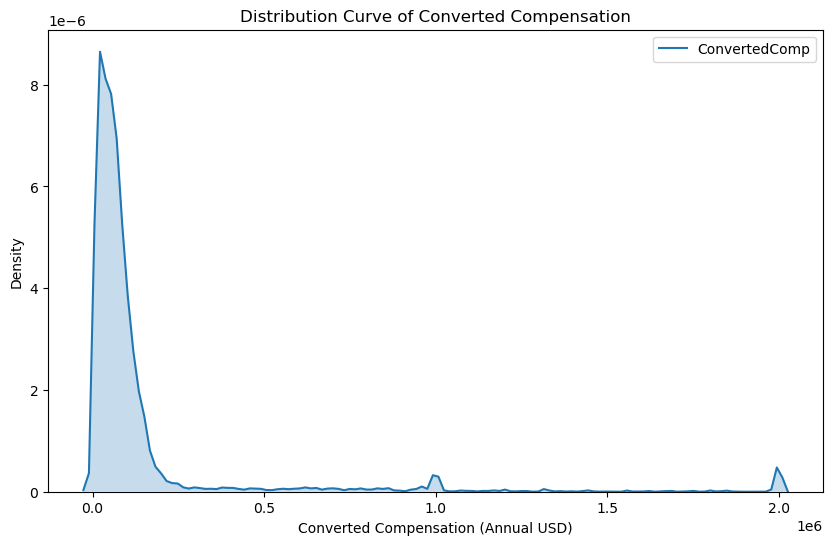

In [3]:
# your code goes here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.kdeplot(df['ConvertedComp'], shade=True)
plt.title('Distribution Curve of Converted Compensation')
plt.xlabel('Converted Compensation (Annual USD)')
plt.ylabel('Density')
plt.show()



Plot the histogram for the column `ConvertedComp`.


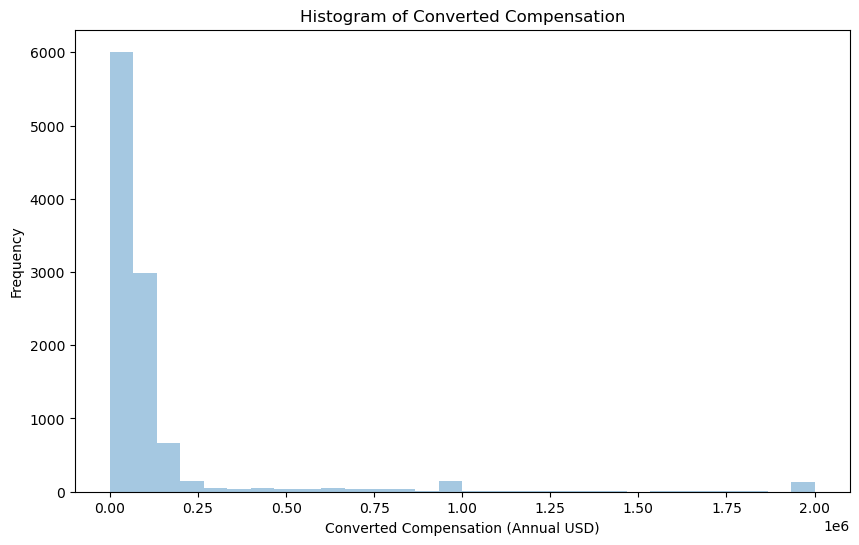

In [6]:
# your code goes here

plt.figure(figsize=(10, 6))
sns.distplot(df['ConvertedComp'].dropna(), kde=False, bins=30)
plt.title('Histogram of Converted Compensation')
plt.xlabel('Converted Compensation (Annual USD)')
plt.ylabel('Frequency')
plt.show()

What is the median of the column `ConvertedComp`?


In [7]:
# your code goes here
median_converted_comp = df['ConvertedComp'].median()

print("Median of 'ConvertedComp':", median_converted_comp)


Median of 'ConvertedComp': 57745.0


How many responders identified themselves only as a **Man**?


In [8]:
# your code goes here
count_man = df[df['Gender'] == 'Man']['Respondent'].count()

print("Number of respondents who identified themselves only as a 'Man':", count_man)

Number of respondents who identified themselves only as a 'Man': 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [11]:
# Filter the dataframe for respondents who identified themselves only as a "Woman"
df_woman = df[df['Gender'] == 'Woman']

# The median 'ConvertedComp' for these respondents
median_converted_comp_woman = df_woman['ConvertedComp'].median()

print("Median ConvertedComp of respondents identified as 'Woman':", median_converted_comp_woman)


Median ConvertedComp of respondents identified as 'Woman': 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [15]:
# your code goes here
age_summary = df['Age'].describe()
print(age_summary)
# Extract the relevant values
min_age = age_summary['min']
q1_age = age_summary['25%']
median_age = age_summary['50%']
q3_age = age_summary['75%']
max_age = age_summary['max']

print("Five-number summary for the 'Age' column:")
print("Minimum:", min_age)
print("Q1:", q1_age)
print("Median:", median_age)
print("Q3:", q3_age)
print("Maximum:", max_age)

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64
Five-number summary for the 'Age' column:
Minimum: 16.0
Q1: 25.0
Median: 29.0
Q3: 35.0
Maximum: 99.0


Plot a histogram of the column `Age`.


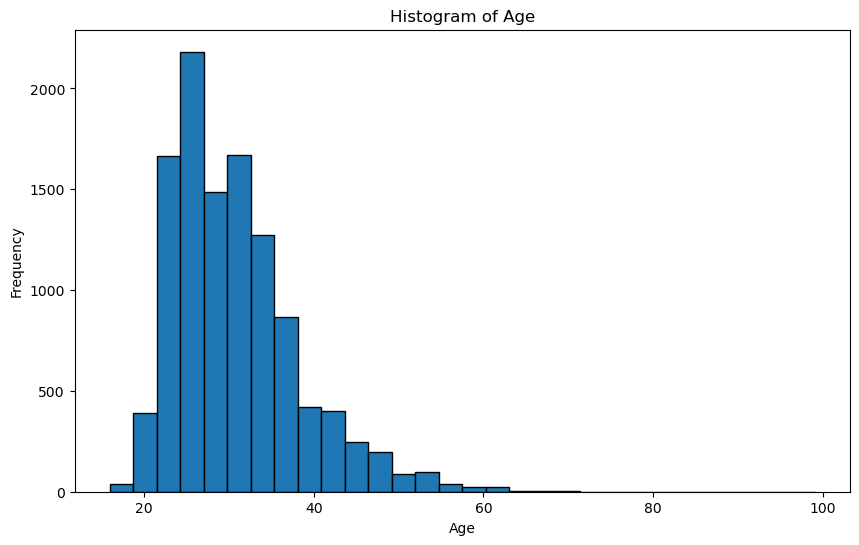

In [16]:
# your code goes here
# Plot the histogram for the 'Age' column
plt.figure(figsize=(10, 6))
plt.hist(df['Age'].dropna(), bins=30, edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


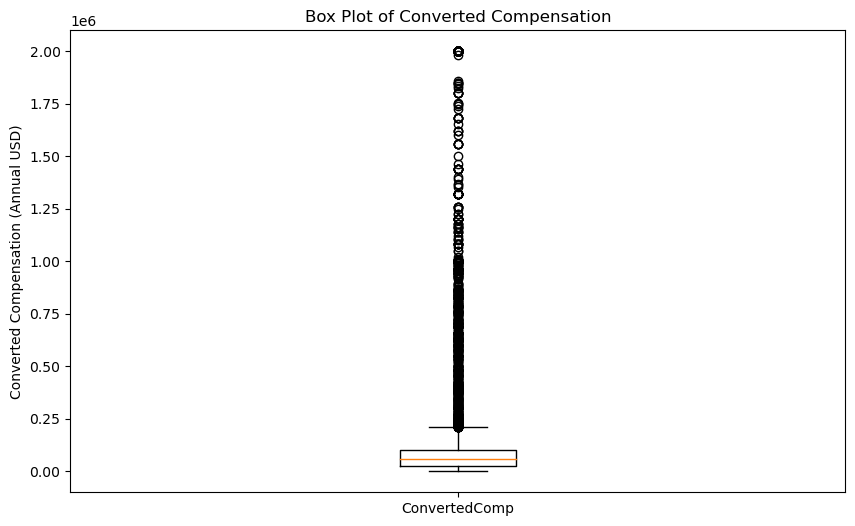

In [17]:
# your code goes here
plt.figure(figsize=(10, 6))
plt.boxplot(df['ConvertedComp'].dropna())
plt.title('Box Plot of Converted Compensation')
plt.ylabel('Converted Compensation (Annual USD)')
plt.xticks([1], ['ConvertedComp'])
plt.show()


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [18]:
# your code goes here
# Calculate Q1 and Q3
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

print("Interquartile Range (IQR) for 'ConvertedComp':", IQR)


Interquartile Range (IQR) for 'ConvertedComp': 73132.0


Find out the upper and lower bounds.


In [19]:
# your code goes here
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)


Lower Bound: -82830.0
Upper Bound: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [20]:
# your code goes here
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]

print("Number of outliers in the 'ConvertedComp' column:", outliers.shape[0])


Number of outliers in the 'ConvertedComp' column: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [21]:
# your code goes here
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

print("New dataframe without outliers in the 'ConvertedComp' column:\n", df_no_outliers.head())

New dataframe without outliers in the 'ConvertedComp' column:
    Respondent                      MainBranch Hobbyist  \
0           4  I am a developer by profession       No   
1           9  I am a developer by profession      Yes   
2          13  I am a developer by profession      Yes   
4          17  I am a developer by profession      Yes   
5          19  I am a developer by profession      Yes   

                                         OpenSourcer  \
0                                              Never   
1                         Once a month or more often   
2  Less than once a month but more than once per ...   
4  Less than once a month but more than once per ...   
5                                              Never   

                                          OpenSource          Employment  \
0  The quality of OSS and closed source software ...  Employed full-time   
1  The quality of OSS and closed source software ...  Employed full-time   
2  OSS is, on average, 

In [22]:
df_no_outliers.to_csv("df_no_outliers.csv", index=False)

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [27]:
correlation_matrix = df.corr()
age_correlation = correlation_matrix['Age']
print(age_correlation)

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
